In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv("../data/matches.csv")
deliveries = pd.read_csv("../data/deliveries.csv")
matches.head()
deliveries.head()

,match_id,inning,batting_team,bowling_team,batsman,bowler,batsman_runs,total_runs,ball
0,1,1,MI,CSK,Rohit Sharma,Bravo,4,4,1
1,1,1,MI,CSK,Rohit Sharma,Bravo,6,6,2
2,1,1,MI,CSK,Hardik Pandya,Bravo,2,2,3
3,1,2,CSK,MI,MS Dhoni,Bumrah,4,4,1
4,2,1,CSK,RCB,Suresh Raina,Chahal,4,4,1


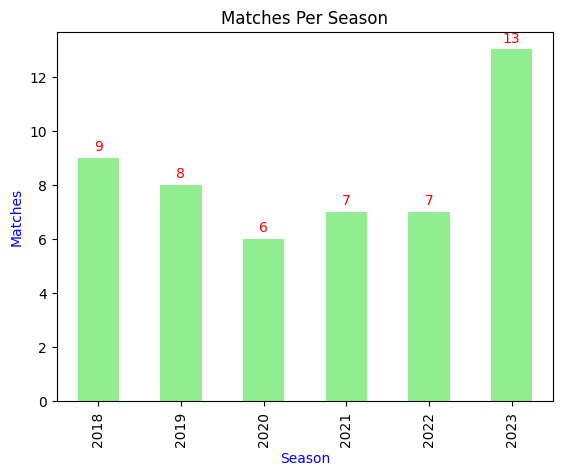

In [3]:
# Matches per season
season_count = matches["season"].value_counts().sort_index()

# By assigning the plot to ax, we get control over the specific "drawing area."
ax = season_count.plot(kind="bar", title="Matches Per Season", color="lightgreen")

ax.bar_label(ax.containers[0], padding=3, color = 'red')
plt.ylabel("Matches", color='blue')
plt.xlabel("Season",color = 'blue')
plt.show()

In [4]:
# toss impact analysis
toss_win_pct = (matches["toss_winner"] == matches["winner"]).mean() * 100
print("Toss Win Percentage:", round(toss_win_pct, 2), "%")


Toss Win Percentage: 78.0 %


In [5]:
# Total Matches won by each team over all seasons
top_teams = matches["winner"].value_counts()
top_teams.head(5)



winner
CSK    13
MI     10
KKR     6
RR      6
GT      4
Name: count, dtype: int64

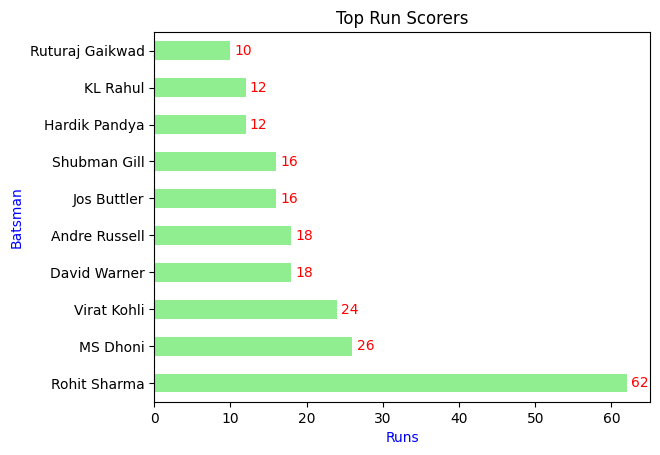

In [6]:
# top run scorer over all seasons
top_batsmen = deliveries.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(10)

ax = top_batsmen.plot(kind="barh", title="Top Run Scorers", color = 'lightgreen')
ax.bar_label(ax.containers[0], padding=3, color = 'red')

plt.ylabel("Batsman", color = 'blue')
plt.xlabel("Runs", color = 'blue')
plt.show()


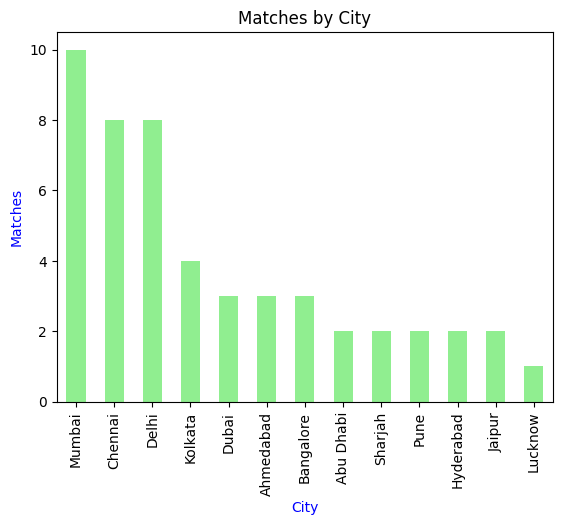

In [7]:
city_count = matches['city'].value_counts()
city_count.plot(kind='bar', title='Matches by City',color = 'lightgreen')
plt.ylabel('Matches', color = 'blue')
plt.xlabel('City', color = 'blue')
plt.show()

In [8]:
# Season champions
mask = (matches['match_stage'] == 'Final')
final_winners = matches[mask]

final_winners[['season', 'winner', 'venue']]

,season,winner,venue
6,2018,MI,Wankhede Stadium
12,2019,MI,Wankhede Stadium
16,2020,MI,Dubai Stadium
21,2021,CSK,Dubai Stadium
26,2022,GT,Narendra Modi Stadium
38,2023,CSK,Narendra Modi Stadium


In [9]:
# Number of seasons won by each team

#final_winners['winner'].value_counts()
final_winners['winner'].value_counts().reset_index(name = 'count').set_axis(['Team', 'Finals Won'], axis=1)


,Team,Finals Won
0,MI,3
1,CSK,2
2,GT,1


In [10]:
mask = (deliveries['batsman_runs'] == 6)
six_hitters = deliveries[mask]
six_hitters['batsman'].value_counts().reset_index().set_axis(['Batsman','Total_Sixes'],axis = 1)

,Batsman,Total_Sixes
0,Rohit Sharma,7
1,Andre Russell,3
2,MS Dhoni,3
3,Virat Kohli,2
4,Shubman Gill,2
5,Jos Buttler,2
6,KL Rahul,2
7,Suresh Raina,1
8,Hardik Pandya,1
9,Shikhar Dhawan,1


In [17]:
bowler_stats = deliveries.groupby('bowler').agg(
balls=('ball', 'count'),
runs=('total_runs', 'sum')
)

bowler_stats['economy']  = bowler_stats['runs'] / (bowler_stats['balls']/6)
bowler_stats.sort_values('economy', ascending = True)

#filtered = bowler_stats[bowler_stats['balls'] >= 12]
#filtered.sort_values('economy')




,balls,runs,economy
bowler,,,
Bishnoi,3,12,24.0
Boult,2,8,24.0
Harshal Patel,1,4,24.0
Holder,1,4,24.0
Jadeja,1,4,24.0
Narine,6,26,26.0
Bravo,9,42,28.0
Bumrah,6,28,28.0
Shami,4,20,30.0
